Nama : Angelina Nirmala Puteri Dika Praktiko

NPM  : 24083010055

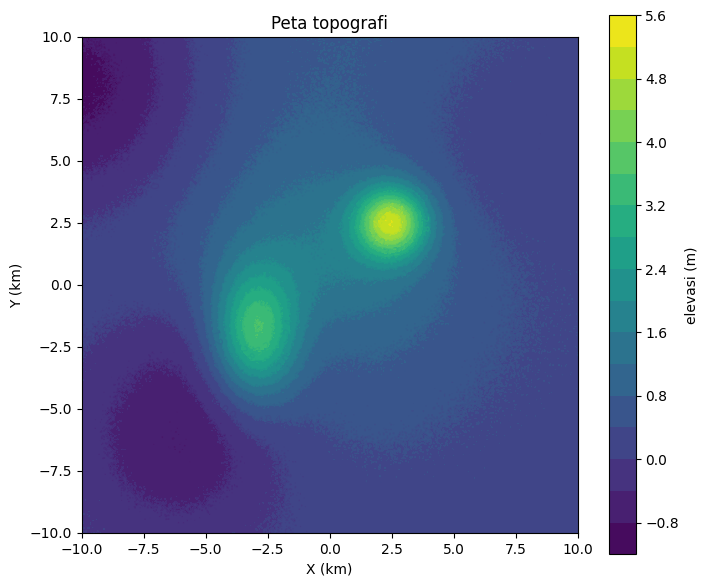

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

NPM=55
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)


def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = peak(-3, -2, 1.2, 1.8, 3.2) + peak(2.5, 2.5, 1.0, 1.0, 4) + peak(0, 0, 3.5, 3.5, 1.2) \
    + peak(6, 6, 4, 4, -0.6)  + peak(-10, 8, 3.5, 3.5, -1.2) +  peak(-6, -6, 3, 3, -1.0) \
    + peak(-2, -2, 4, 2, -0.6)  + peak(2.5, 9.5, 6, 6, 0.75)


Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))


Z += 0.05 * np.random.randn(*Z.shape)


fig, ax = plt.subplots(figsize=(8, 7))
levels = 18
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.set_title("Peta topografi")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")



#1) cari titik tertinggi global  

Titik tertinggi global:
  X = 2.448
  Y = 2.465
  Z = 5.181


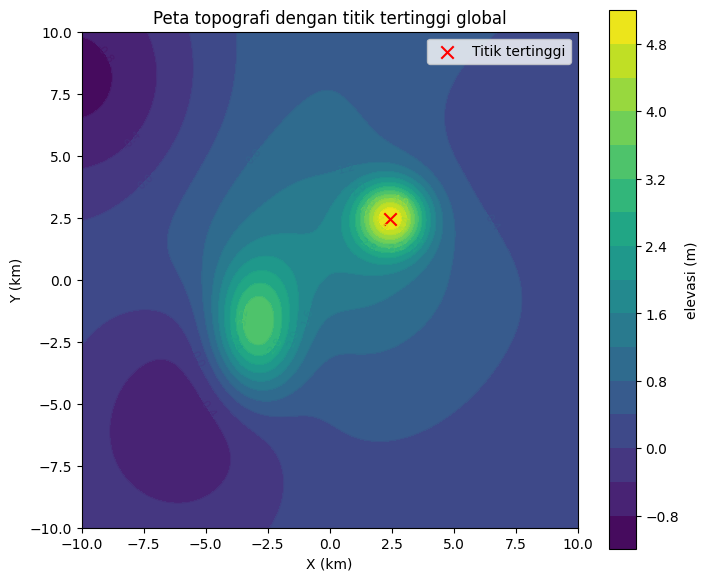

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

NPM = 55
np.random.seed(NPM)


nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)


def peak(x0, y0, sx, sy, amp, X, Y):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))


def topo_func(pos):
    x, y = pos
    Z = (
        peak(-3, -2, 1.2, 1.8, 3.2, x, y)
        + peak(2.5, 2.5, 1.0, 1.0, 4, x, y)
        + peak(0, 0, 3.5, 3.5, 1.2, x, y)
        + peak(6, 6, 4, 4, -0.6, x, y)
        + peak(-10, 8, 3.5, 3.5, -1.2, x, y)
        + peak(-6, -6, 3, 3, -1.0, x, y)
        + peak(-2, -2, 4, 2, -0.6, x, y)
        + peak(2.5, 9.5, 6, 6, 0.75, x, y)
        + 0.5 * np.exp(-(np.sqrt((x/20)**2 + (y/10)**2)))
    )
    return Z


def neg_topo(pos):
    return -topo_func(pos)


bounds = [(-10, 10), (-10, 10)]


result = differential_evolution(neg_topo, bounds, seed=NPM)
x_max, y_max = result.x
z_max = topo_func((x_max, y_max))

print(f"Titik tertinggi global:")
print(f"  X = {x_max:.3f}")
print(f"  Y = {y_max:.3f}")
print(f"  Z = {z_max:.3f}")


Z = (
    peak(-3, -2, 1.2, 1.8, 3.2, X, Y)
    + peak(2.5, 2.5, 1.0, 1.0, 4, X, Y)
    + peak(0, 0, 3.5, 3.5, 1.2, X, Y)
    + peak(6, 6, 4, 4, -0.6, X, Y)
    + peak(-10, 8, 3.5, 3.5, -1.2, X, Y)
    + peak(-6, -6, 3, 3, -1.0, X, Y)
    + peak(-2, -2, 4, 2, -0.6, X, Y)
    + peak(2.5, 9.5, 6, 6, 0.75, X, Y)
    + 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
)

fig, ax = plt.subplots(figsize=(8,7))
levels = 18
cf = ax.contourf(X, Y, Z, levels=levels)
cs = ax.contour(X, Y, Z, levels=levels, linewidths=0.6)
ax.clabel(cs, fmt="%.1f", fontsize=8)
ax.scatter(x_max, y_max, c='red', s=80, marker='x', label='Titik tertinggi')
ax.legend()
ax.set_title("Peta topografi dengan titik tertinggi global")
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.colorbar(cf, ax=ax, label="elevasi (m)")
plt.show()


Menunjukkan hasil identifikasi titik tertinggi pada permukaan topografi yang merepresentasikan variasi elevasi suatu permukaan tanah dengan beberapa puncak dan lembah. Melalui metode optimasi differential evolution, algoritma secara adaptif mencari koordinat dengan nilai elevasi maksimum di seluruh area, meskipun permukaannya kompleks dan tidak teratur. Titik tertinggi yang ditemukan menunjukkan posisi dominan yang berpotensi menjadi puncak utama daerah tersebut. Dengan tiik tertingginya ada disekitar koordinat X=2.448, Y=2.465

#2) cari titik aliran 'sungai' menuju titik terendah, asumsikan jika 'hujan' langsung mengalir dan tidak terserap ke tanah


=== Titik Awal dan Akhir Aliran Air (Koordinat) ===
Titik 1: Awal (x=0.98, y=5.83) → Akhir (x=1.67, y=6.41)
Titik 2: Awal (x=4.30, y=0.58) → Akhir (x=4.86, y=-0.06)
Titik 3: Awal (x=2.06, y=1.36) → Akhir (x=2.81, y=-1.26)
Titik 4: Awal (x=0.90, y=8.51) → Akhir (x=0.97, y=8.49)
Titik 5: Awal (x=-1.53, y=-8.58) → Akhir (x=-1.40, y=-8.73)
Titik 6: Awal (x=2.92, y=-8.26) → Akhir (x=2.58, y=-8.10)
Titik 7: Awal (x=-1.25, y=-9.60) → Akhir (x=-1.33, y=-9.92)
Titik 8: Awal (x=7.84, y=6.65) → Akhir (x=8.72, y=5.63)
Titik 9: Awal (x=9.27, y=5.56) → Akhir (x=9.93, y=4.78)
Titik 10: Awal (x=-2.33, y=7.40) → Akhir (x=-2.44, y=7.62)


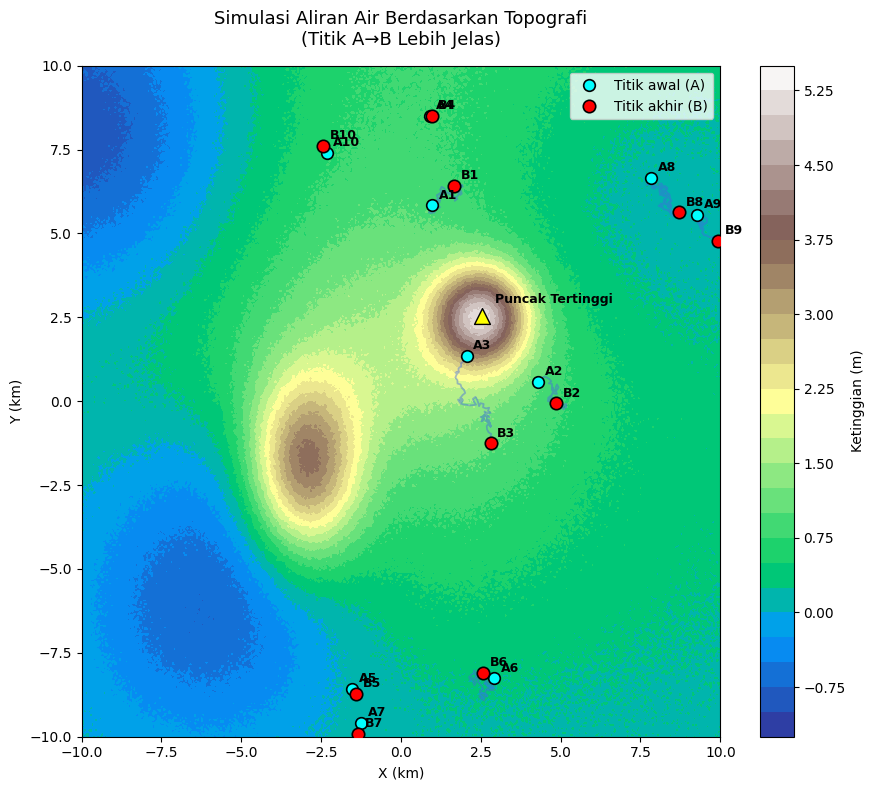

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import RectBivariateSpline

NPM = 55
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (
    peak(-3, -2, 1.2, 1.8, 3.2)
    + peak(2.5, 2.5, 1.0, 1.0, 4)
    + peak(0, 0, 3.5, 3.5, 1.2)
    + peak(6, 6, 4, 4, -0.6)
    + peak(-10, 8, 3.5, 3.5, -1.2)
    + peak(-6, -6, 3, 3, -1.0)
    + peak(-2, -2, 4, 2, -0.6)
    + peak(2.5, 9.5, 6, 6, 0.75)
)
Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

spline = RectBivariateSpline(x, y, Z.T)

np.random.seed(0)
n_particles = 10
start_x = np.random.uniform(-10, 10, n_particles)
start_y = np.random.uniform(-10, 10, n_particles)
positions = np.vstack([start_x, start_y]).T

trajectories = []
for pos in positions:
    path = [pos]
    for _ in range(100):
        x0, y0 = path[-1]
        dzdx = spline(x0, y0, dx=1, dy=0)[0, 0]
        dzdy = spline(x0, y0, dx=0, dy=1)[0, 0]
        grad = np.array([dzdx, dzdy])
        step = -0.1 * grad / (np.linalg.norm(grad) + 1e-6)
        new_pos = path[-1] + step
        if not (-10 <= new_pos[0] <= 10 and -10 <= new_pos[1] <= 10):
            break
        path.append(new_pos)
    trajectories.append(np.array(path))

end_points = np.array([traj[-1] for traj in trajectories])

print("\n=== Titik Awal dan Akhir Aliran Air (Koordinat) ===")
for i in range(n_particles):
    print(f"Titik {i+1}: Awal (x={start_x[i]:.2f}, y={start_y[i]:.2f}) → Akhir (x={end_points[i,0]:.2f}, y={end_points[i,1]:.2f})")

plt.figure(figsize=(9, 8))
contour = plt.contourf(X, Y, Z, levels=25, cmap='terrain')
plt.colorbar(contour, label='Ketinggian (m)')

for i, traj in enumerate(trajectories, start=1):
    plt.plot(traj[:, 0], traj[:, 1], color='royalblue', alpha=0.45, linewidth=1.3, zorder=2)
    plt.text(traj[0, 0]+0.2, traj[0, 1]+0.2, f"A{i}", color='black', fontsize=9, weight='bold', zorder=5)
    plt.text(traj[-1, 0]+0.2, traj[-1, 1]+0.2, f"B{i}", color='black', fontsize=9, weight='bold', zorder=5)

plt.scatter(start_x, start_y, color='cyan', s=70, edgecolor='black', linewidth=1.2, zorder=4, label='Titik awal (A)')
plt.scatter(end_points[:,0], end_points[:,1], color='red', s=80, edgecolor='black', linewidth=1.2, zorder=4, label='Titik akhir (B)')

i_max, j_max = np.unravel_index(np.argmax(Z), Z.shape)
plt.scatter(X[i_max, j_max], Y[i_max, j_max], s=130, color='yellow', edgecolor='black', marker='^', zorder=6)
plt.text(X[i_max, j_max]+0.4, Y[i_max, j_max]+0.4, 'Puncak Tertinggi', color='black', fontsize=9, weight='bold', zorder=7)

plt.title("Simulasi Aliran Air Berdasarkan Topografi\n(Titik A→B Lebih Jelas)", fontsize=13, pad=15)
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.legend()
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.tight_layout()
plt.show()


Dari visualisasi ini terlihat simulasi aliran air pada permukaan topografi yang bervariasi antara dataran rendah (hijau) hingga area tinggi (cokelat). Titik berwarna cyan (A) menunjukkan posisi awal air, sedangkan titik merah (B) menandai titik akhir aliran setelah mengikuti kontur medan menuju daerah yang lebih rendah. Jalur biru menggambarkan arah aliran air dari titik awal ke akhir, memperlihatkan bagaimana air mengalir mengikuti kemiringan topografi. Titik segitiga kuning menandakan puncak tertinggi di wilayah tersebut, yaitu area dengan elevasi maksimum tempat aliran air tidak akan menuju ke atas, melainkan menyebar ke lereng di sekitarnya. Secara keseluruhan, peta ini menunjukkan bagaimana bentuk permukaan memengaruhi arah dan pola aliran air. Dapat juga dilihat dari visualisasi, jika pada awalnya titik 23 itu berada di koordinat  (x=2.06, y=1.36) dan akhirnya menjadi  (x=2.81, y=-1.26), hal ini membuktikan jika aliran airnya mengalir dari puncak tinggi ke rendah

#3) kerawanan erosi ditentukan oleh kecuraman lereng, hitung skor kerawanan di tiap titik

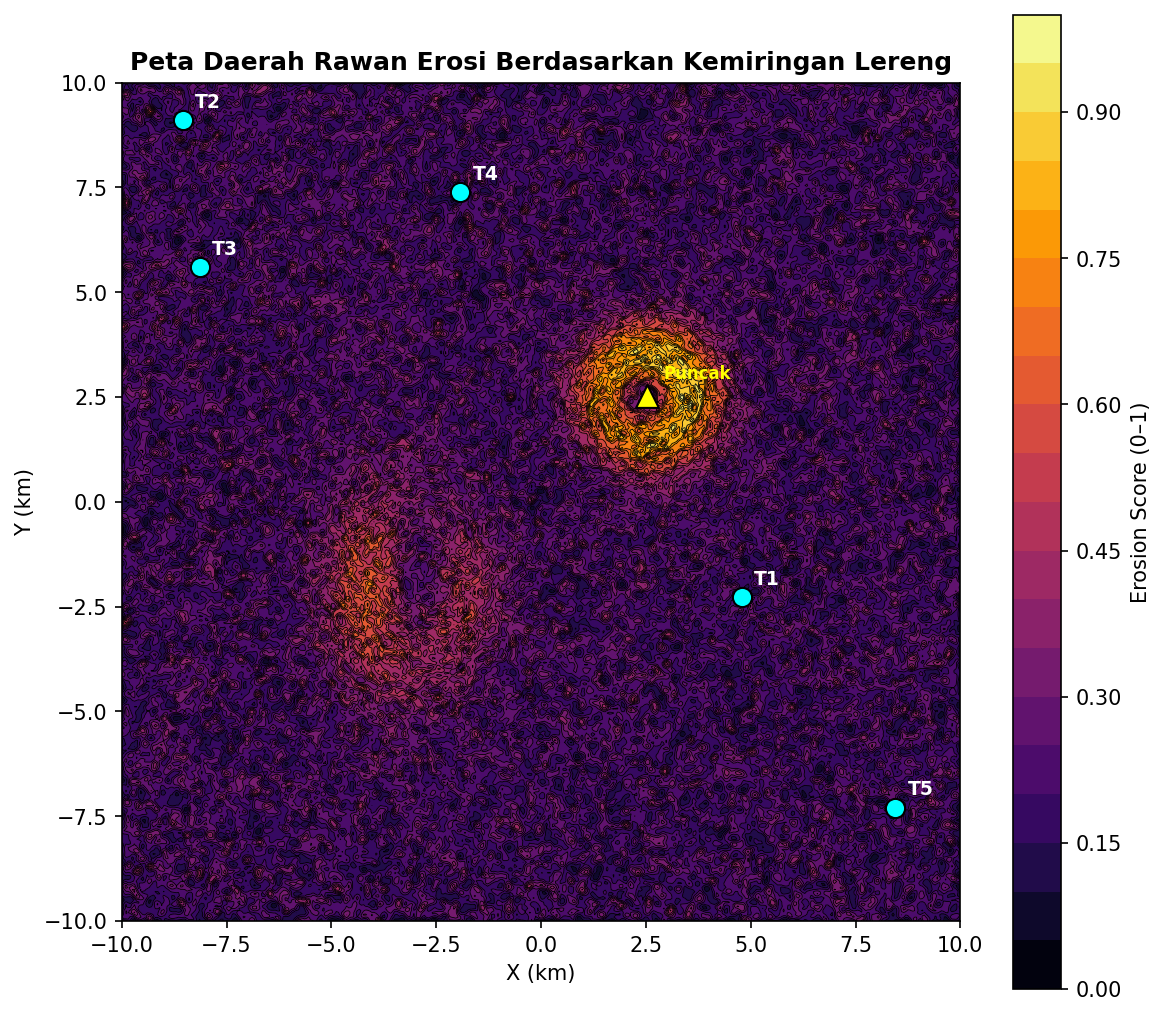

In [ ]:
from scipy.ndimage import gaussian_filter

def turunan_parsial(Z, dx, dy):
    dZdx = np.zeros_like(Z)
    dZdy = np.zeros_like(Z)
    dZdx[:, 1:-1] = (Z[:, 2:] - Z[:, :-2]) / (2 * dx)
    dZdy[1:-1, :] = (Z[2:, :] - Z[:-2, :]) / (2 * dy)
    return dZdx, dZdy

dx = (x[1] - x[0]) * 1000
dy = (y[1] - y[0]) * 1000
dZdx, dZdy = turunan_parsial(Z, dx, dy)
kemiringan = np.sqrt(dZdx**2 + dZdy**2)

kemiringan = gaussian_filter(kemiringan, sigma=1)

erosion_score = (kemiringan - kemiringan.min()) / (kemiringan.max() - kemiringan.min())

# Define selected_points - a list of random indices to plot
np.random.seed(NPM) # Ensure reproducibility of random points
num_selected_points = 5
selected_points_indices = np.random.randint(0, nx, size=(num_selected_points, 2))


plt.figure(figsize=(8,7), dpi=150)
levels = 20

cf = plt.contourf(X, Y, erosion_score, cmap='inferno', levels=levels)
cs = plt.contour(X, Y, erosion_score, colors='black', linewidths=0.4, levels=levels)

for idx, (i, j) in enumerate(selected_points_indices, start=1):
    plt.scatter(X[i, j], Y[i, j], s=85, color='cyan', edgecolor='black', zorder=5)
    plt.text(X[i, j]+0.3, Y[i, j]+0.3, f"T{idx}", color='white', fontsize=9, weight='bold')

plt.scatter(X[i_max, j_max], Y[i_max, j_max], s=120, color='yellow', edgecolor='black', marker='^', zorder=6)
plt.text(X[i_max, j_max]+0.4, Y[i_max, j_max]+0.4, "Puncak", color='yellow', fontsize=8, weight='bold')

plt.title("Peta Daerah Rawan Erosi Berdasarkan Kemiringan Lereng", fontsize=12, weight='bold')
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.colorbar(cf, label="Erosion Score (0–1)")
plt.gca().set_aspect("equal")
plt.tight_layout()
plt.show()

Peta menunjukkan area kerawanan erosi berdasarkan kemiringan lereng. Warna kuning–jingga menandai zona dengan erosion score tinggi, sedangkan ungu–gelap menunjukkan risiko rendah. Titik-titik rawan erosi terlihat mengelompok pada area lereng yang curam di sekitar puncak bukit. Hal ini menunjukkan bahwa kemiringan lereng merupakan faktor dominan penyebab erosi.

#4


##a) jika tanah hendak diratakan, berapa banyak volume tanah yang harus dipindahkan? (dipotong dari puncak dan diurug ke lembah)

Ketinggian target rata-rata tanah     : 0.5017 meter
Luas tiap grid cell                    : 2512.55 m²
Volume tanah yang dipotong (cut)       : 1.10e+08 m³
Volume tanah yang diurug (fill)        : 1.10e+08 m³
Volume cut & fill setelah bobot (1.26) : 1.39e+08 m³ dan 1.39e+08 m³


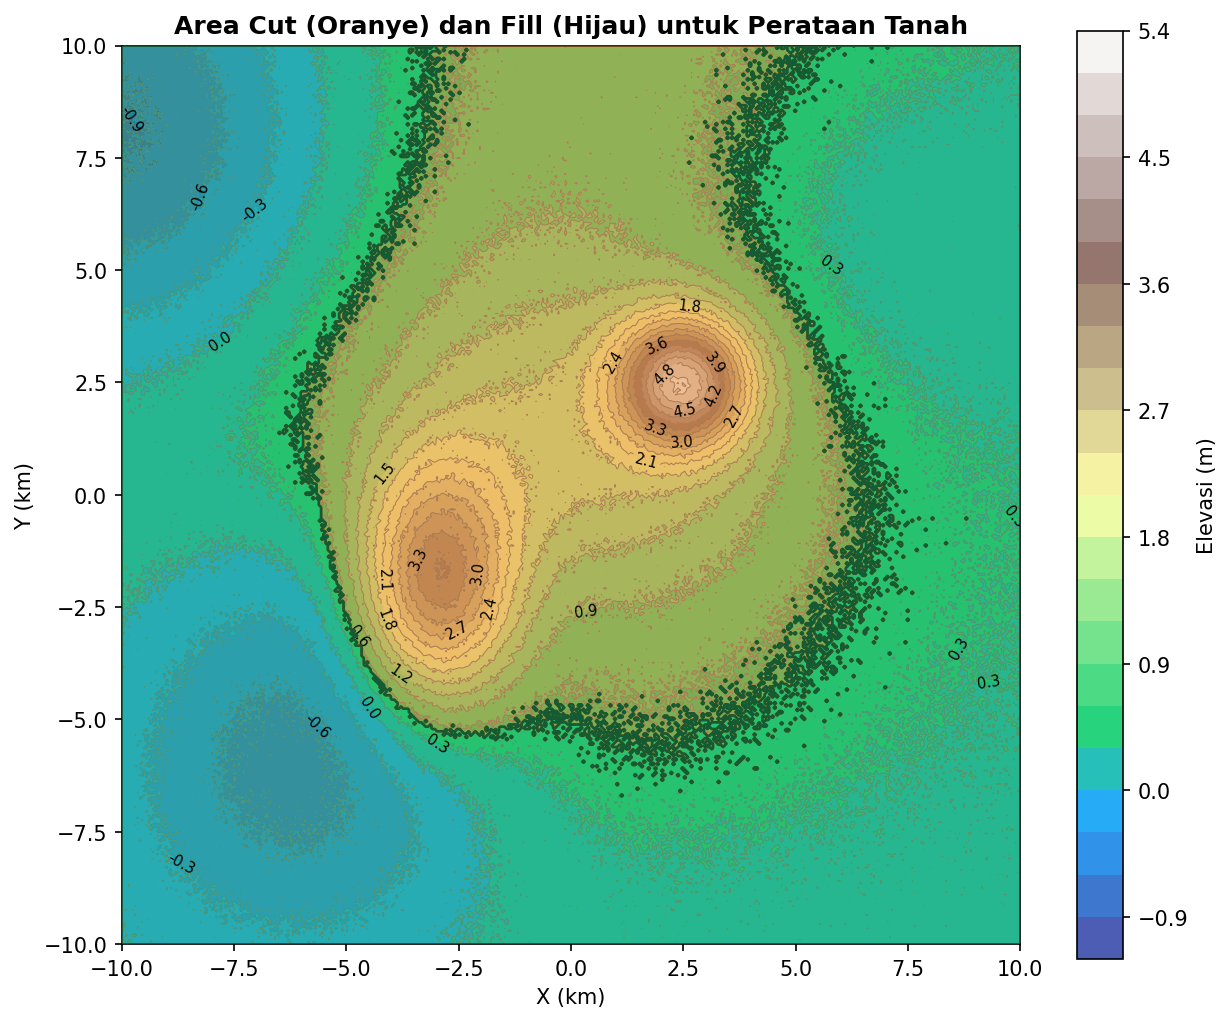

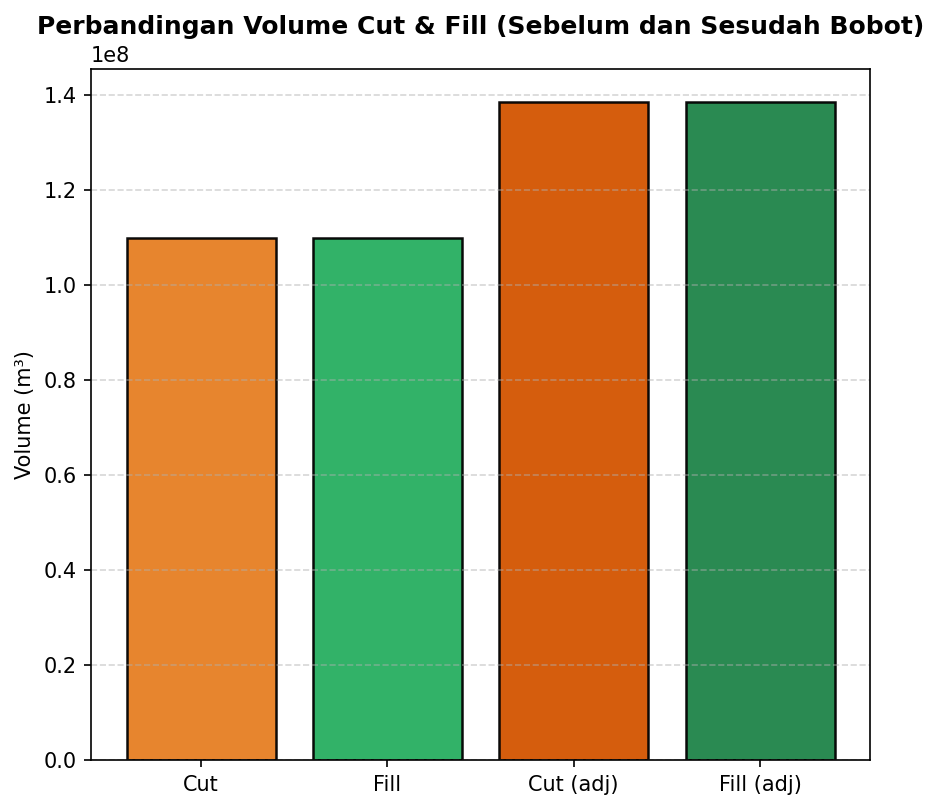

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

NPM = 55
np.random.seed(NPM)

nx, ny = 400, 400
x = np.linspace(-10, 10, nx)
y = np.linspace(-10, 10, ny)
X, Y = np.meshgrid(x, y)

def peak(x0, y0, sx, sy, amp):
    return amp * np.exp(-(((X - x0)**2) / (2*sx**2) + ((Y - y0)**2) / (2*sy**2)))

Z = (
    peak(-3, -2, 1.2, 1.8, 3.2)
    + peak(2.5, 2.5, 1.0, 1.0, 4)
    + peak(0, 0, 3.5, 3.5, 1.2)
    + peak(6, 6, 4, 4, -0.6)
    + peak(-10, 8, 3.5, 3.5, -1.2)
    + peak(-6, -6, 3, 3, -1.0)
    + peak(-2, -2, 4, 2, -0.6)
    + peak(2.5, 9.5, 6, 6, 0.75)
)

Z += 0.5 * np.exp(-(np.sqrt((X/20)**2 + (Y/10)**2)))
Z += 0.05 * np.random.randn(*Z.shape)

h_target = Z.mean()

dx = (x[1] - x[0]) * 1000
dy = (y[1] - y[0]) * 1000
cell_area = dx * dy

cut_volume = np.sum((Z - h_target)[Z > h_target]) * cell_area
fill_volume = np.sum((h_target - Z)[Z < h_target]) * cell_area

bobot = 1.20 * 1.05
cut_adjusted = cut_volume * bobot
fill_adjusted = fill_volume * bobot

print(f"Ketinggian target rata-rata tanah     : {h_target:.4f} meter")
print(f"Luas tiap grid cell                    : {cell_area:.2f} m²")
print(f"Volume tanah yang dipotong (cut)       : {cut_volume:.2e} m³")
print(f"Volume tanah yang diurug (fill)        : {fill_volume:.2e} m³")
print(f"Volume cut & fill setelah bobot (1.26) : {cut_adjusted:.2e} m³ dan {fill_adjusted:.2e} m³")

fig, ax = plt.subplots(figsize=(8.5, 7), dpi=150)
levels = 20
cf = ax.contourf(X, Y, Z, levels=levels, cmap='terrain', alpha=0.85)
cs = ax.contour(X, Y, Z, levels=levels, colors='gray', linewidths=0.5)
ax.clabel(cs, fmt="%.1f", fontsize=7, colors='black')

ax.contourf(X, Y, Z > h_target, levels=[0.5, 1],
             colors=['#E67E22'], alpha=0.45, zorder=3)
ax.contour(X, Y, Z > h_target, levels=[0.5], colors='#A04000', linewidths=1.2, zorder=4)

ax.contourf(X, Y, Z < h_target, levels=[0.5, 1],
             colors=['#27AE60'], alpha=0.45, zorder=3)
ax.contour(X, Y, Z < h_target, levels=[0.5], colors='#145A32', linewidths=1.2, zorder=4)

plt.colorbar(cf, ax=ax, label="Elevasi (m)")
ax.set_title("Area Cut (Oranye) dan Fill (Hijau) untuk Perataan Tanah", fontsize=12, fontweight='bold')
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_aspect('equal', adjustable='box')
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5.5), dpi=150)
bars = ['Cut', 'Fill', 'Cut (adj)', 'Fill (adj)']
values = [cut_volume, fill_volume, cut_adjusted, fill_adjusted]
colors = ['#E67E22', '#27AE60', '#D35400', '#1E8449']

plt.bar(bars, values, color=colors, edgecolor='black', linewidth=1.2, alpha=0.95)
plt.ylabel("Volume (m³)")
plt.title("Perbandingan Volume Cut & Fill (Sebelum dan Sesudah Bobot)", fontsize=12, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Menggambarkan analisis volume tanah yang perlu dipindahkan agar permukaan lahan menjadi rata pada ketinggian rata-rata tertentu. Nilai elevasi rata-rata dijadikan sebagai tinggi target perataan, dan dihitungg berapa banyak tanah yang harus dipotong (cut) dari area yang lebih tinggi dan diurug (fill) ke area yang lebih rendah. Visualisasi memperlihatkan zona oranye sebagai wilayah yang perlu dipotong dan zona hijau sebagai area yang perlu diisi.

##b) berapa ketinggian akhir tanah yang rata tersebut?

Ketinggian akhir tanah setelah diratakan: 0.5017 meter (rata-rata elevasi area)


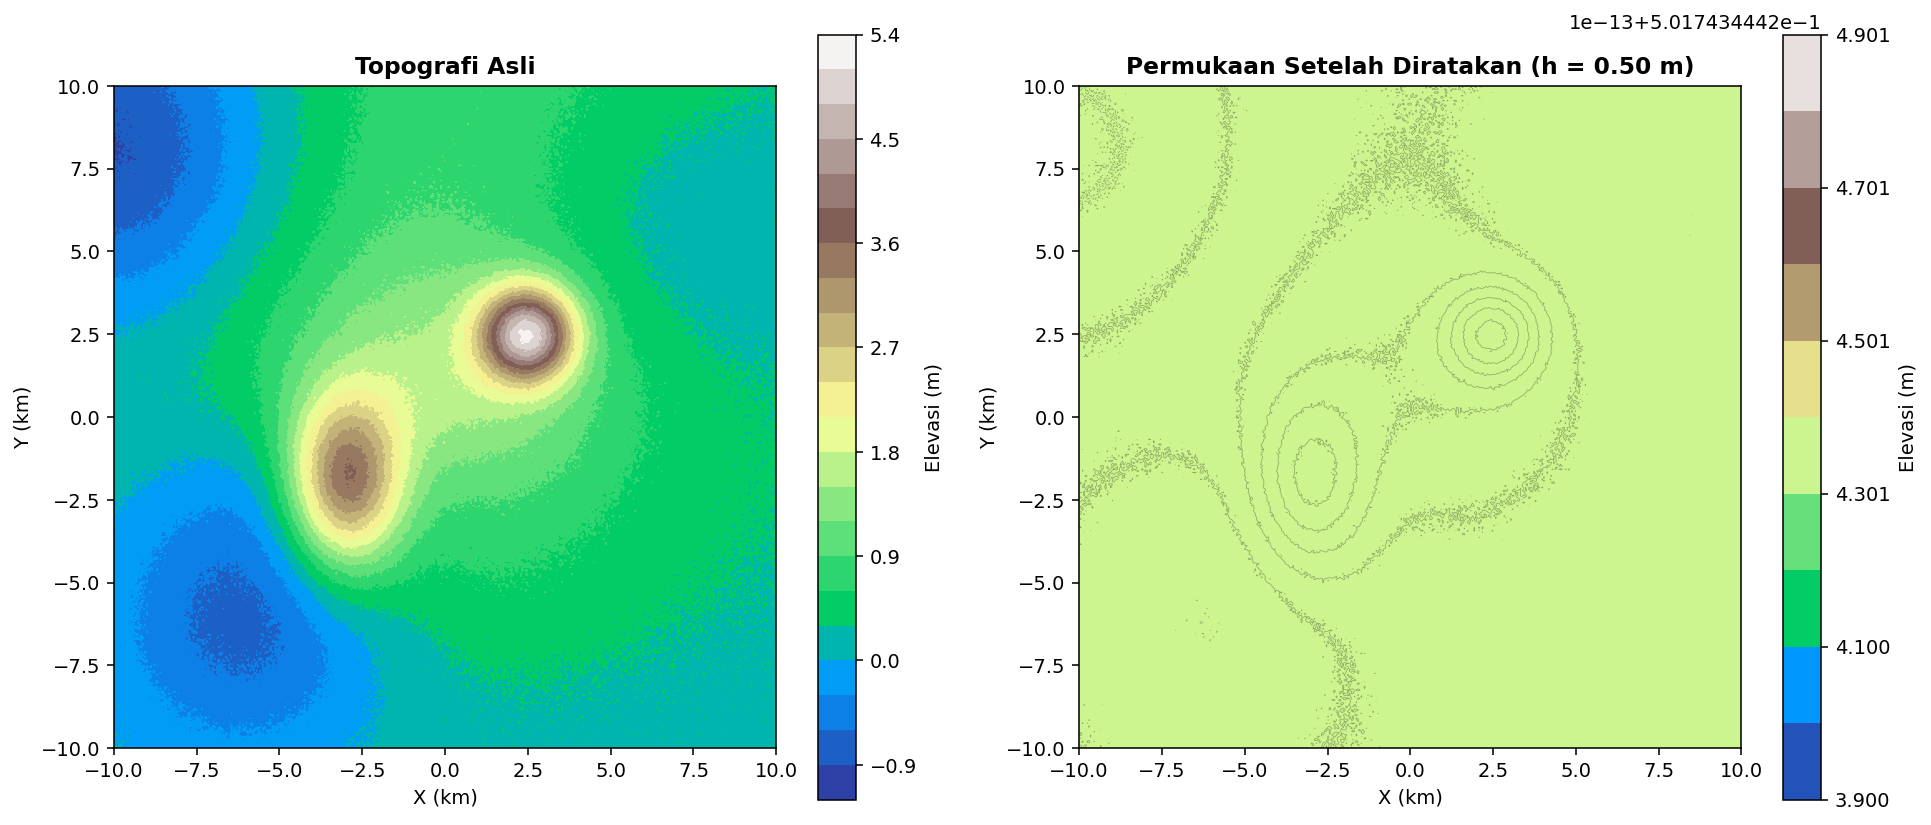

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

h_rata = Z.mean()

print(f"Ketinggian akhir tanah setelah diratakan: {h_rata:.4f} meter (rata-rata elevasi area)")

Z_flat = np.full_like(Z, h_rata)

fig, ax = plt.subplots(1, 2, figsize=(14, 6), dpi=140)

cf1 = ax[0].contourf(X, Y, Z, levels=20, cmap='terrain')
ax[0].set_title("Topografi Asli", fontsize=12, fontweight='bold')
ax[0].set_xlabel("X (km)")
ax[0].set_ylabel("Y (km)")
ax[0].set_aspect('equal')
plt.colorbar(cf1, ax=ax[0], label="Elevasi (m)")

cf2 = ax[1].contourf(X, Y, Z_flat, levels=10, cmap='terrain')
ax[1].contour(X, Y, Z, colors='k', linewidths=0.4, alpha=0.3)
ax[1].set_title(f"Permukaan Setelah Diratakan (h = {h_rata:.2f} m)", fontsize=12, fontweight='bold')
ax[1].set_xlabel("X (km)")
ax[1].set_ylabel("Y (km)")
ax[1].set_aspect('equal')
plt.colorbar(cf2, ax=ax[1], label="Elevasi (m)")

plt.tight_layout()
plt.show()


Menunjukkan hasil perataan tanah  setelah proses pemotongan dan pengurugan dilakukan untuk mencapai ketinggian rata-rata dri seluruh area. Visualisasi sisi kiri menampilkan kondisi topografi asli, sedangkan sisi kanan memperlihatkan permukaan lahan setelah diratakan, di mana seluruh area telah disetarakan pada tinggi yang sama.